In [1]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy
import PIL
import requests

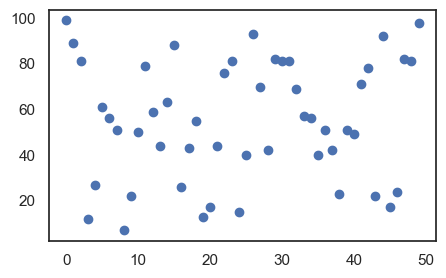

In [37]:
# Set a random seed for reproducibility
np.random.seed(613)

# Generate a numpy array of evenly spaced numbers bewtween 0 and 49
x = np.arange(50)

# Generate a numpy array of 50 random numbers between 1 and 100
y = np.random.randint(1,100,50)

# Configure graph size
fig, ax = plt.subplots(figsize = (5,3))

# Generate a scatter plot
ax.scatter(x,y)


<BarContainer object of 50 artists>

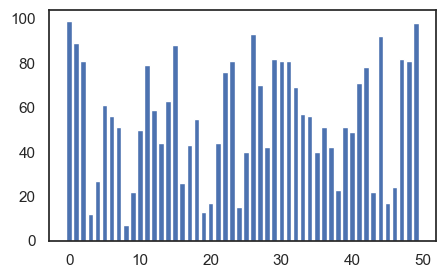

In [38]:
# Generate a bar graph
fig, ax = plt.subplots(figsize = (5,3))
ax.bar (x,y)

<BarContainer object of 50 artists>

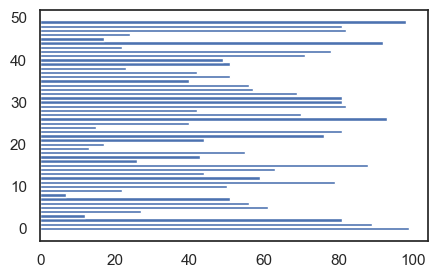

In [39]:
# Generate horizontal bar graph
fig, ax = plt.subplots(figsize = (5,3))
ax.barh (x,y)

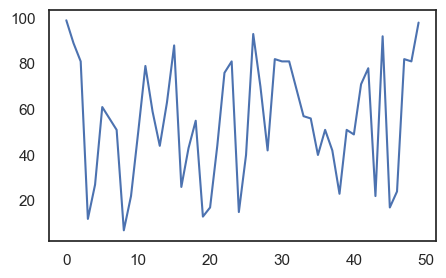

In [40]:
# Generate a line graph
fig, ax = plt.subplots(figsize = (5,3))
ax.plot (x,y)

(array([4., 6., 2., 5., 7., 6., 4., 3., 9., 4.]),
 array([ 7. , 16.2, 25.4, 34.6, 43.8, 53. , 62.2, 71.4, 80.6, 89.8, 99. ]),
 <BarContainer object of 10 artists>)

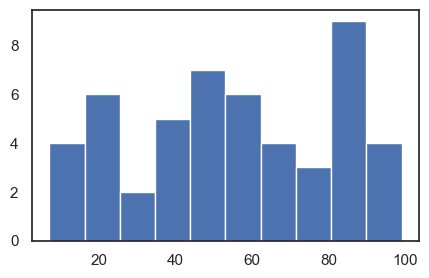

In [41]:
# Generate a histogram
fig, ax = plt.subplots(figsize = (5,3))
ax.hist (y)

Text(0.5, 0, 'Years since start')

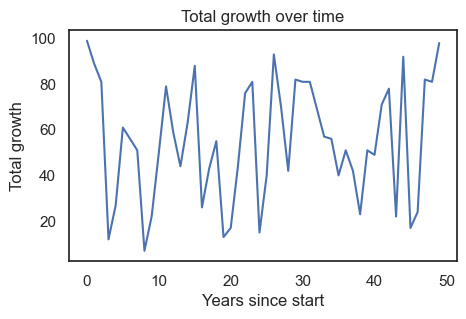

In [42]:
fig, ax = plt.subplots(figsize = (5,3))
ax.plot (x,y)

ax.set_title('Total growth over time') # add graph title
ax.set_ylabel('Total growth') # add y axis label
ax.set_xlabel('Years since start')# add x axis label

Text(0.5, 0, 'Years since start')

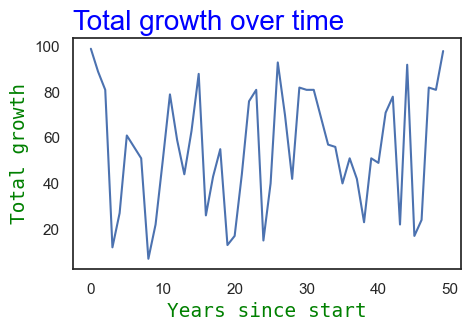

In [43]:
# make a dictionary with label properties
font1 = {'family' : 'sans-serif', 'color':'blue', 'size': 20}
font2 = {'family' : 'monospace', 'color':'green', 'size': 14}

fig, ax = plt.subplots(figsize = (5,3))
ax.plot (x,y)

ax.set_title('Total growth over time', fontdict=font1, loc = 'left') # format graph title with prespecified properties
ax.set_ylabel('Total growth',fontdict=font2) # format y axis label with prespecified properties
ax.set_xlabel('Years since start',fontdict=font2)# format x axis label with prespecified properties

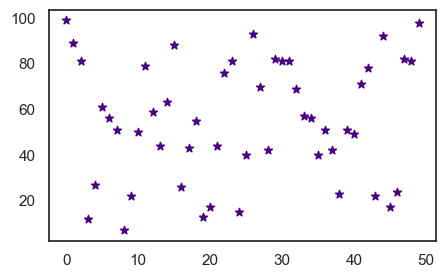

In [44]:
fig, ax = plt.subplots(figsize = (5,3))

ax.scatter(x, 
           y, 
           marker = '*', # modify marker shape
           color = 'indigo') # modify marker color

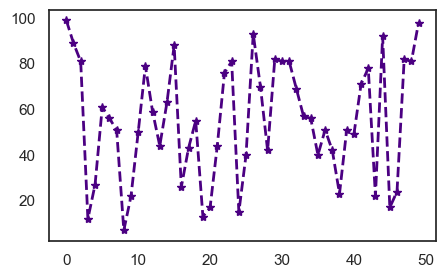

In [45]:
fig, ax = plt.subplots(figsize = (5,3))

ax.plot(x, 
           y, 
           marker = '*',
           color = 'indigo',
           linestyle = '--', # modify line style
           linewidth = 2) # modify line width

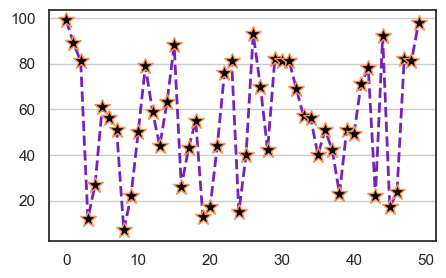

In [46]:
fig, ax = plt.subplots(figsize = (5,3))

ax.plot(x, 
           y, 
           marker = '*',
           markersize = 12, # modify marker size
           color = '#7425b9', # modify color with hex colors
           linestyle = '--', 
           linewidth = 2,
           markeredgecolor = '#fa9359', # modify marker edge color with hex colors
           markerfacecolor = '#000000') # modify marker face color with hex colors

#add gridlines
ax.grid(axis = 'y')

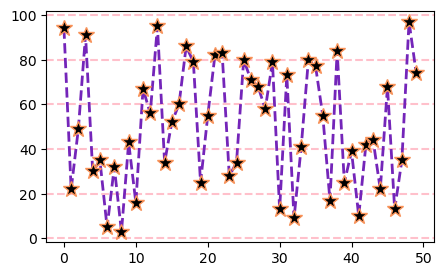

In [32]:
fig, ax = plt.subplots(figsize = (5,3))

ax.plot(x, 
        y, 
        marker = '*',
        markersize = 12,
        color = '#7425b9', 
        linestyle = '--', 
        linewidth = 2,
        markeredgecolor = '#fa9359',
        markerfacecolor = '#000000') 

#add gridlines
ax.grid(axis = 'y', 
        color = 'pink', # modify grid line colors
        linewidth = 1.5,  # modify grid line width
        linestyle = '--')  # modify grid line style

In [34]:
# Reproduce a graph in https://python-graph-gallery.com/
# getting necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# getting the data
temp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2016-weather-data-seattle.csv') # we retrieve the data from plotly's GitHub repository
temp['month'] = pd.to_datetime(temp['Date']).dt.month # we store the month in a separate column

# we define a dictionnary with months that we'll use later
month_dict = {1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'}

# we create a 'month' column
temp['month'] = temp['month'].map(month_dict)

# we generate a pd.Serie with the mean temperature for each month (used later for colors in the FacetGrid plot), and we create a new column in temp dataframe
month_mean_serie = temp.groupby('month')['Mean_TemperatureC'].mean()
temp['mean_month'] = temp['month'].map(month_mean_serie)

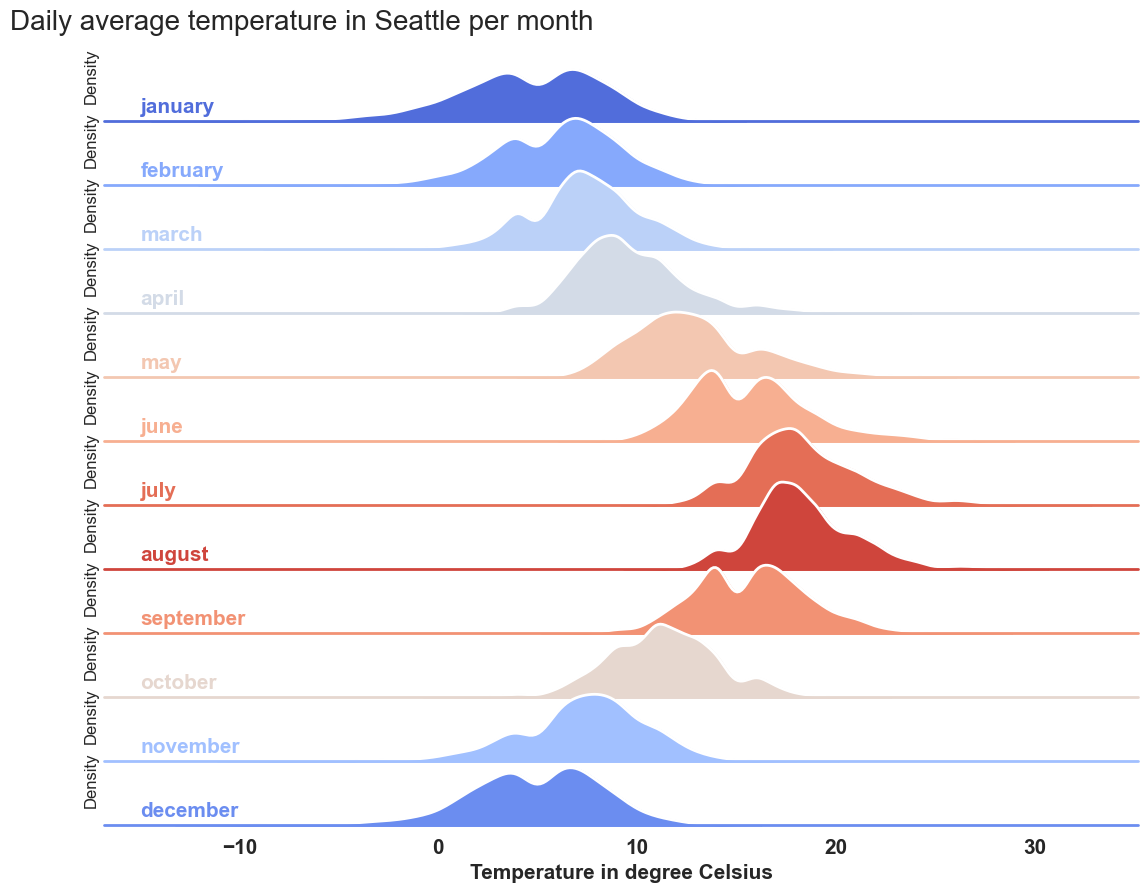

In [35]:
# we generate a color palette with Seaborn.color_palette()
pal = sns.color_palette(palette='coolwarm', n_colors=12)

# in the sns.FacetGrid class, the 'hue' argument is the one that is the one that will be represented by colors with 'palette'
g = sns.FacetGrid(temp, row='month', hue='mean_month', aspect=15, height=0.75, palette=pal)

# then we add the densities kdeplots for each month
g.map(sns.kdeplot, 'Mean_TemperatureC', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=1.5)

# here we add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, 'Mean_TemperatureC',  bw_adjust=1, clip_on=False,  color="w", lw=2)

# here we add a horizontal line for each plot
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# we loop over the FacetGrid figure axes (g.axes.flat) and add the month as text with the right color
# notice how ax.lines[-1].get_color() enables you to access the last line's color in each matplotlib.Axes
for i, ax in enumerate(g.axes.flat):
    ax.text(-15, 0.02, month_dict[i+1],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())
    
# we use matplotlib.Figure.subplots_adjust() function to get the subplots to overlap
g.fig.subplots_adjust(hspace=-0.3)

# eventually we remove axes titles, yticks and spines
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Temperature in degree Celsius', fontweight='bold', fontsize=15)
g.fig.suptitle('Daily average temperature in Seattle per month',
               ha='right',
               fontsize=20,
               fontweight=20)

plt.show()